Fold 1:
1회: theta0 = 6.880, theta1 = -0.122, 차이 = 665755.3265
2회: theta0 = 13.137, theta1 = -1.035, 차이 = 39629.7275
3회: theta0 = 19.289, theta1 = -1.907, 차이 = 38273.0361
4회: theta0 = 25.338, theta1 = -2.738, 차이 = 36965.3618
5회: theta0 = 31.287, theta1 = -3.530, 차이 = 35704.8788
6회: theta0 = 37.137, theta1 = -4.284, 차이 = 34489.8303
7회: theta0 = 42.889, theta1 = -5.001, 차이 = 33318.5261
8회: theta0 = 48.546, theta1 = -5.681, 차이 = 32189.3400
9회: theta0 = 54.110, theta1 = -6.325, 차이 = 31100.7070
10회: theta0 = 59.581, theta1 = -6.935, 차이 = 30051.1216
11회: theta0 = 64.962, theta1 = -7.511, 차이 = 29039.1350
12회: theta0 = 70.255, theta1 = -8.055, 차이 = 28063.3532
13회: theta0 = 75.460, theta1 = -8.566, 차이 = 27122.4349
14회: theta0 = 80.579, theta1 = -9.047, 차이 = 26215.0893
15회: theta0 = 85.614, theta1 = -9.497, 차이 = 25340.0745
16회: theta0 = 90.566, theta1 = -9.917, 차이 = 24496.1952
17회: theta0 = 95.438, theta1 = -10.309, 차이 = 23682.3014
18회: theta0 = 100.229, theta1 = -10.672, 차이 = 22897.2863
19회: the

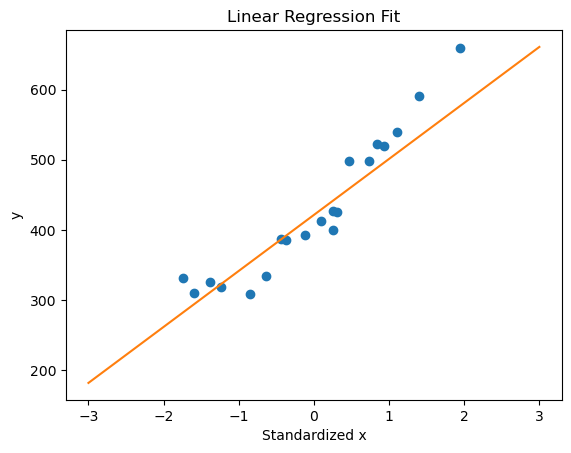

In [1]:
"""
교차 검증(cross-validation)을 적용한 코드를 아래에 제시합니다. 
교차 검증은 데이터를 여러 번 반복하여 나누고, 각 반복에서 훈련 세트와 검증 세트로 나누어 모델을 평가하는 기법입니다. 
아래 코드에서는 간단히 k-fold 교차 검증을 사용하여 구현하였습니다.
데이터를 5번 반복해서 나누고, 각 반복에서 훈련 세트로 모델을 학습하고 검증 세트로 모델을 평가합니다. 
각 폴드에서의 학습 로그와 검증 에러를 출력하여 각 폴드에서의 모델 성능을 평가할 수 있습니다.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# 데이터 파일 경로 설정
file_path = 'click.csv'

try:
    # 학습 데이터 로드
    train = np.loadtxt(file_path, delimiter=',', dtype='int', skiprows=1)
    train_x = train[:, 0]
    train_y = train[:, 1]
except Exception as e:
    print(f"Error loading data from {file_path}: {e}")
    exit(1)

# 파라미터 초기화
theta0 = np.random.rand()
theta1 = np.random.rand()

# 예측 함수 정의
def f(x):
    return theta0 + theta1 * x

# 목적 함수 정의 (오차 계산)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 표준화 함수 정의
mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# 학습률 및 초기 설정
ETA = 1e-3diff
diff = 1
count = 0
error = E(train_z, train_y)

# k-fold 교차 검증 설정
# 랜덤시드 = 42
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_idx = 1

# 교차 검증 반복
for train_idx, val_idx in kfold.split(train_z):
    print(f"Fold {fold_idx}:")

    # 훈련 세트와 검증 세트 준비
    train_z_fold, val_z_fold = train_z[train_idx], train_z[val_idx]
    train_y_fold, val_y_fold = train_y[train_idx], train_y[val_idx]

    # 학습 반복 (에러가 0.01 이하가 될 때까지)
    while diff > 1e-2:
        try:
            # 파라미터 업데이트
            tmp_theta0 = theta0 - ETA * np.sum((f(train_z_fold) - train_y_fold))
            tmp_theta1 = theta1 - ETA * np.sum((f(train_z_fold) - train_y_fold) * train_z_fold)

            # 파라미터 값 업데이트
            theta0, theta1 = tmp_theta0, tmp_theta1

            # 새로운 에러 계산
            current_error = E(train_z_fold, train_y_fold)
            diff = error - current_error
            error = current_error

            # 학습 로그 출력
            count += 1
            log = '{}회: theta0 = {:.3f}, theta1 = {:.3f}, 차이 = {:.4f}'
            print(log.format(count, theta0, theta1, diff))
        except OverflowError as e:
            print(f"Overflow error: {e}")
            break
        except Exception as e:
            print(f"An error occurred: {e}")
            break

    # 검증 세트에 대한 성능 평가
    val_error = E(val_z_fold, val_y_fold)
    print(f"Validation error for fold {fold_idx}: {val_error}\n")

    # fold 인덱스 증가
    fold_idx += 1

# 최종 학습 결과 시각화
try:
    x = np.linspace(-3, 3, 100)
    plt.plot(train_z, train_y, 'o')
    plt.plot(x, f(x))
    plt.xlabel('Standardized x')
    plt.ylabel('y')
    plt.title('Linear Regression Fit')
    plt.show()
except Exception as e:
    print(f"Error during plotting: {e}")
